# Sheet 6

In [2]:
import numpy as np

from matplotlib import pyplot as plt
plt.rc('font', family='monospace', size=14, serif='courier')
plt.rc('mathtext', fontset='stix')

import scipy.sparse
from sklearn.linear_model import Ridge, LinearRegression

from IPython.display import Image


# 1. Regularization and Basis

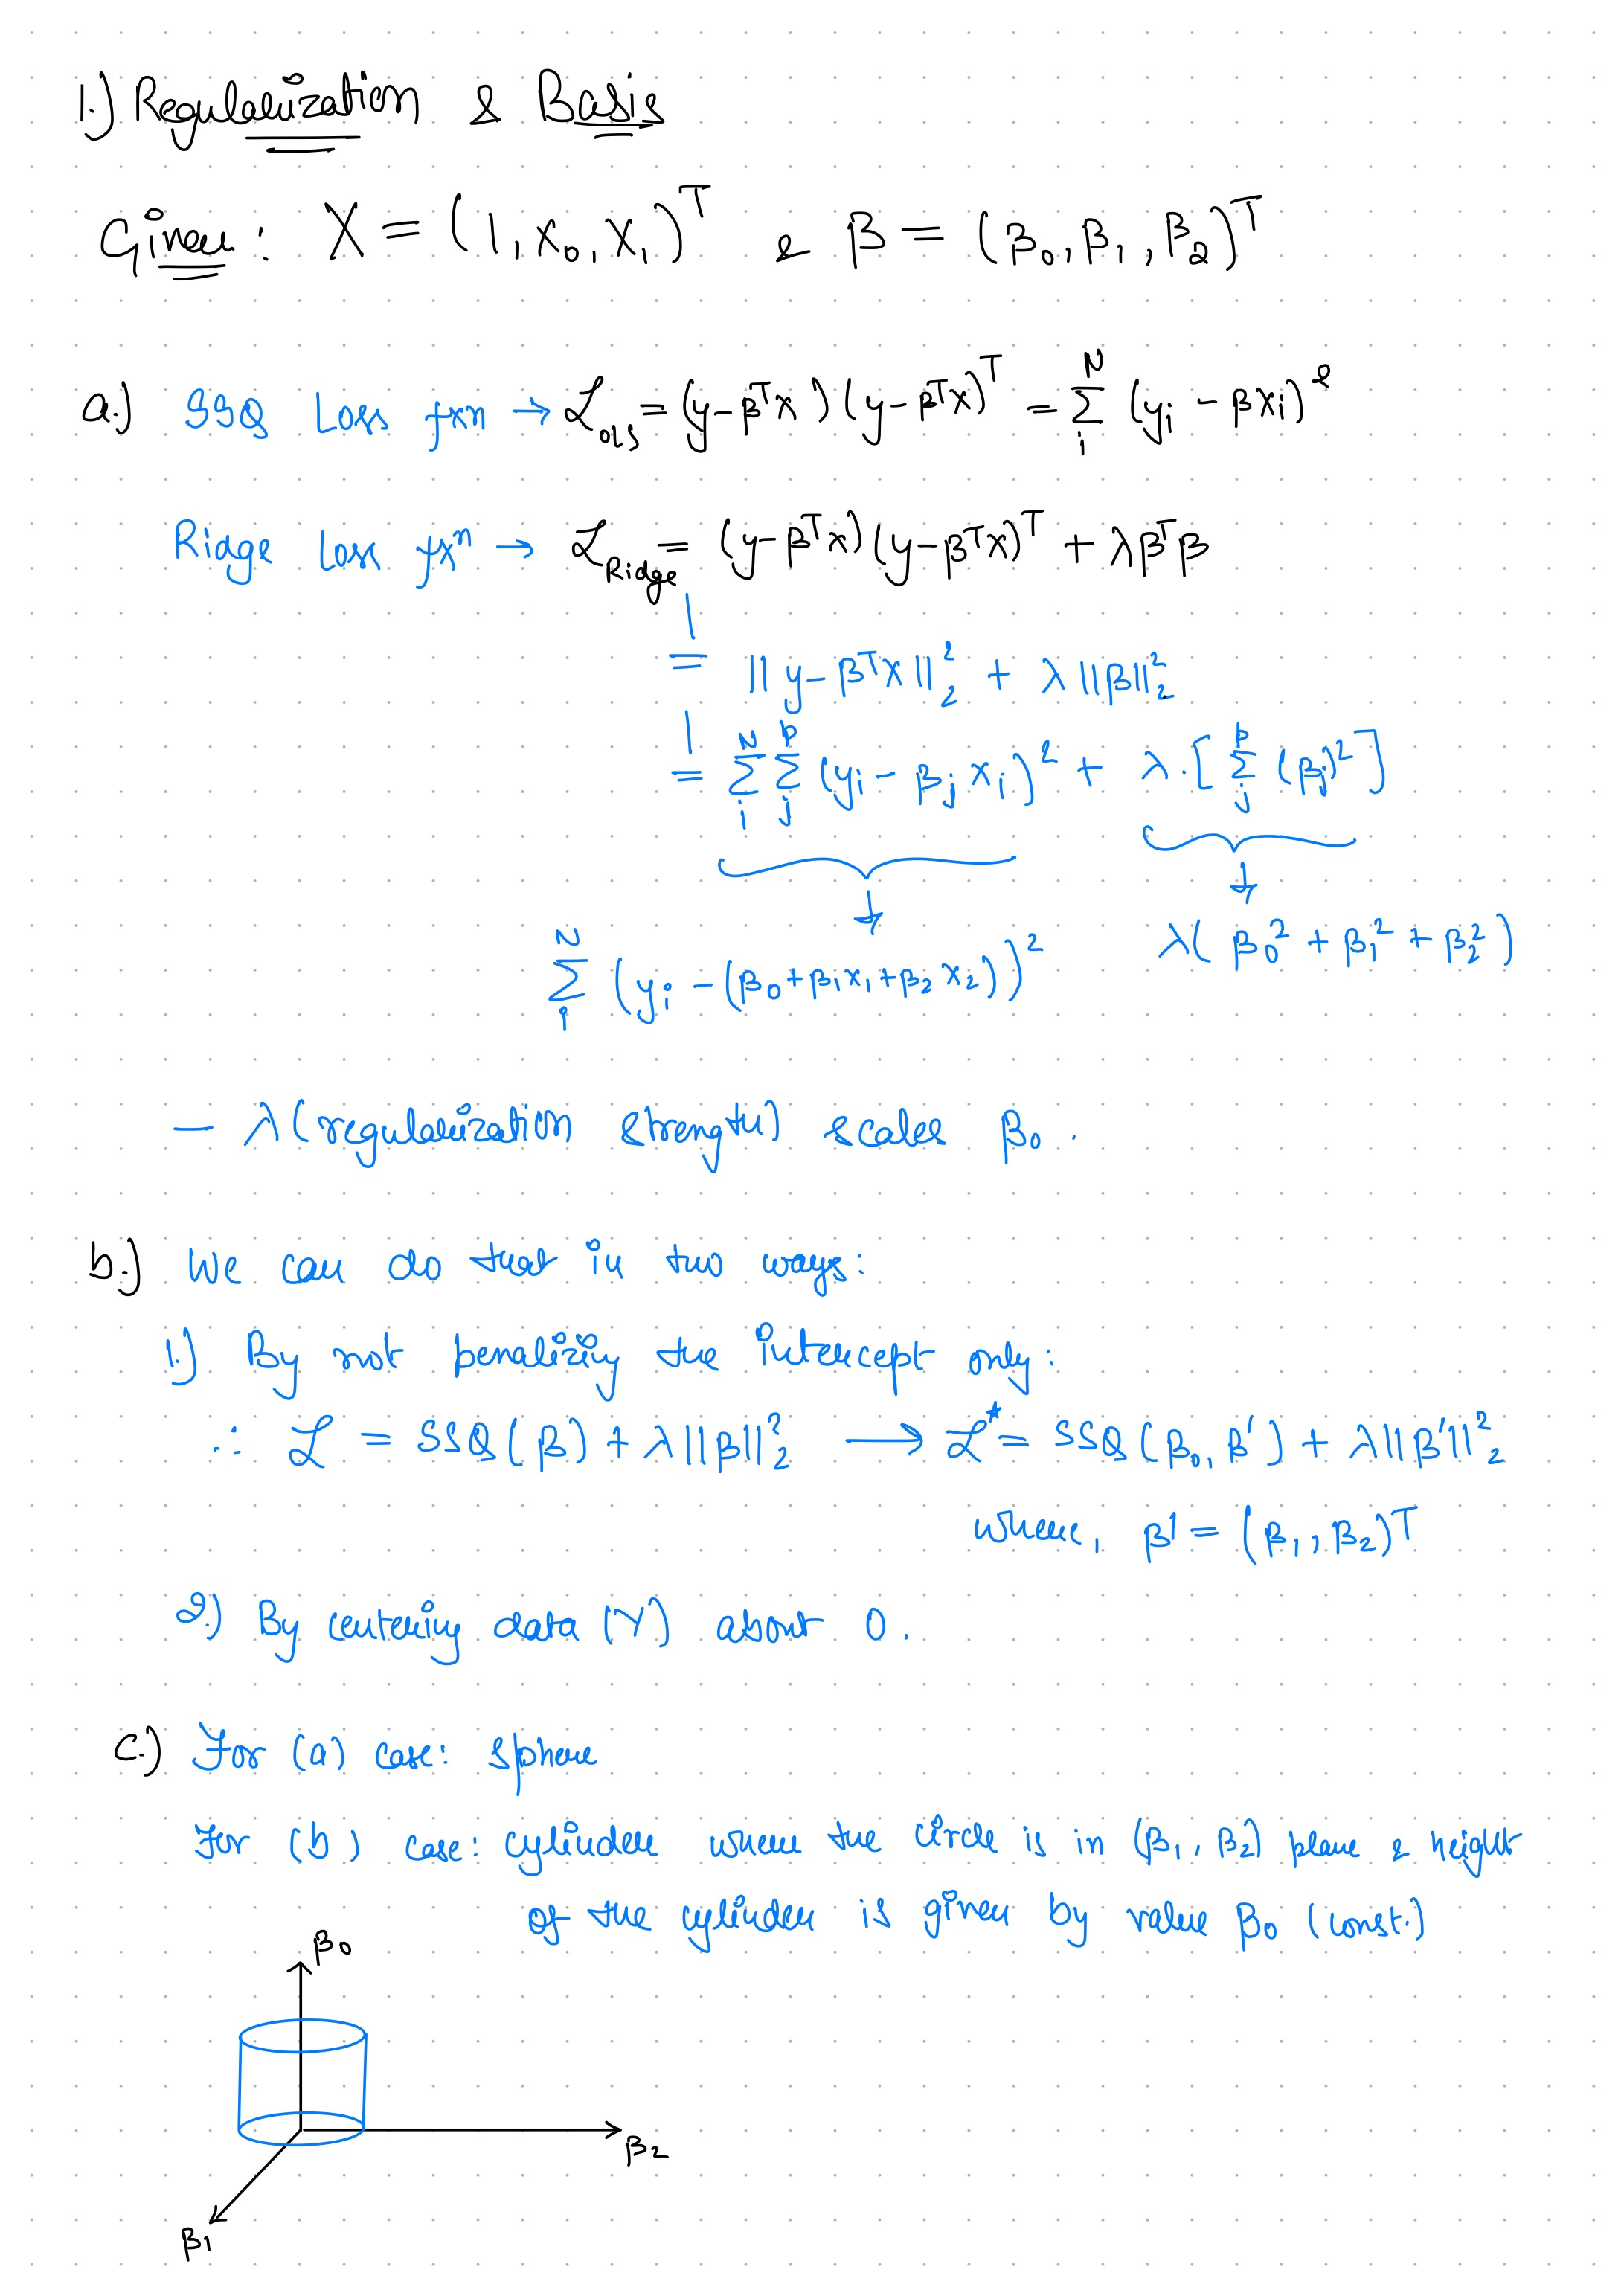

In [23]:
Image(filename='Sheet06-1.jpg') 

# 2. Estimating Parameter Relevance

In [24]:
# load the data
with open('data/vostok.txt', 'r') as f:
    lines = f.readlines()
    
# remove header and split lines
lines = [l.split() for l in lines[2:]]

# filter out lines with missing data
lines = [l for l in lines if len(l) == 4]

# convert to float
lines = np.array(lines).astype(np.float32)
print(f'{lines.shape=}')

features = np.concatenate([lines[:, :1], lines[:, 2:]], axis=1).T
feature_names = 'age', 'CO₂', 'dust'
labels = lines[:, 1]
label_name = '∆T'

print(f'{features.shape=}, {labels.shape=}')

lines.shape=(3729, 4)
features.shape=(3, 3729), labels.shape=(3729,)


In [25]:
# TODO: fit the linear regressor and compute the sum of square deviations\

model =  LinearRegression()   ##first creating a model
model.fit(features.T,labels)   ##this will fit the model with the input features.T and target variable labels

y_pred = model.predict(features.T) ### this is the predicted labels


def squared_residuls(pred):
    return np.sum(np.square(pred-labels))
square_error_base = squared_residuls(y_pred)
print(" The sum of squared residuals(unperturbed rows) is = " +str(square_error_base))    


 The sum of squared residuals(unperturbed rows) is = 6362.9375


In [26]:
# TODO: for each feature, randomly permute it amongst the samples, 
print(" The sum of squared residuals(unperturbed rows) is = " +str(square_error_base))    
def permutation(i):
    """
    Input : takes the three values of the particular row i =[0,1,2]
    output: return the feature matrix with ith row permuted

    """
    permutation_array = np.arange(0,len(labels)) ##this will create the index array ranging from 0 to N-1 

    np.random.shuffle(permutation_array)
    X_i = np.array(features)

    X_i[i,:] = features[i,:][permutation_array]   ##permuting the ith row

    return  X_i

#       refit the regressor and compte sum of squared deviations
square_res_arr = []
for i in range(3):
    X = permutation(i)
    model.fit(X.T,labels)
    y_pred = model.predict(X.T)
    epsilon = squared_residuls(y_pred)
    square_res_arr.append(epsilon)
print("SSQ for only first,second and third row perturbed is respectively ", square_res_arr  )  

 The sum of squared residuals(unperturbed rows) is = 6362.9375
SSQ for only first,second and third row perturbed is respectively  [6817.659, 19161.434, 6528.004]


### From the values we see that second feature is most relevant because it posses the large SSQ compared to others. While the third feature is least relevant.  

# 3. $\sigma^2$ Estimation 

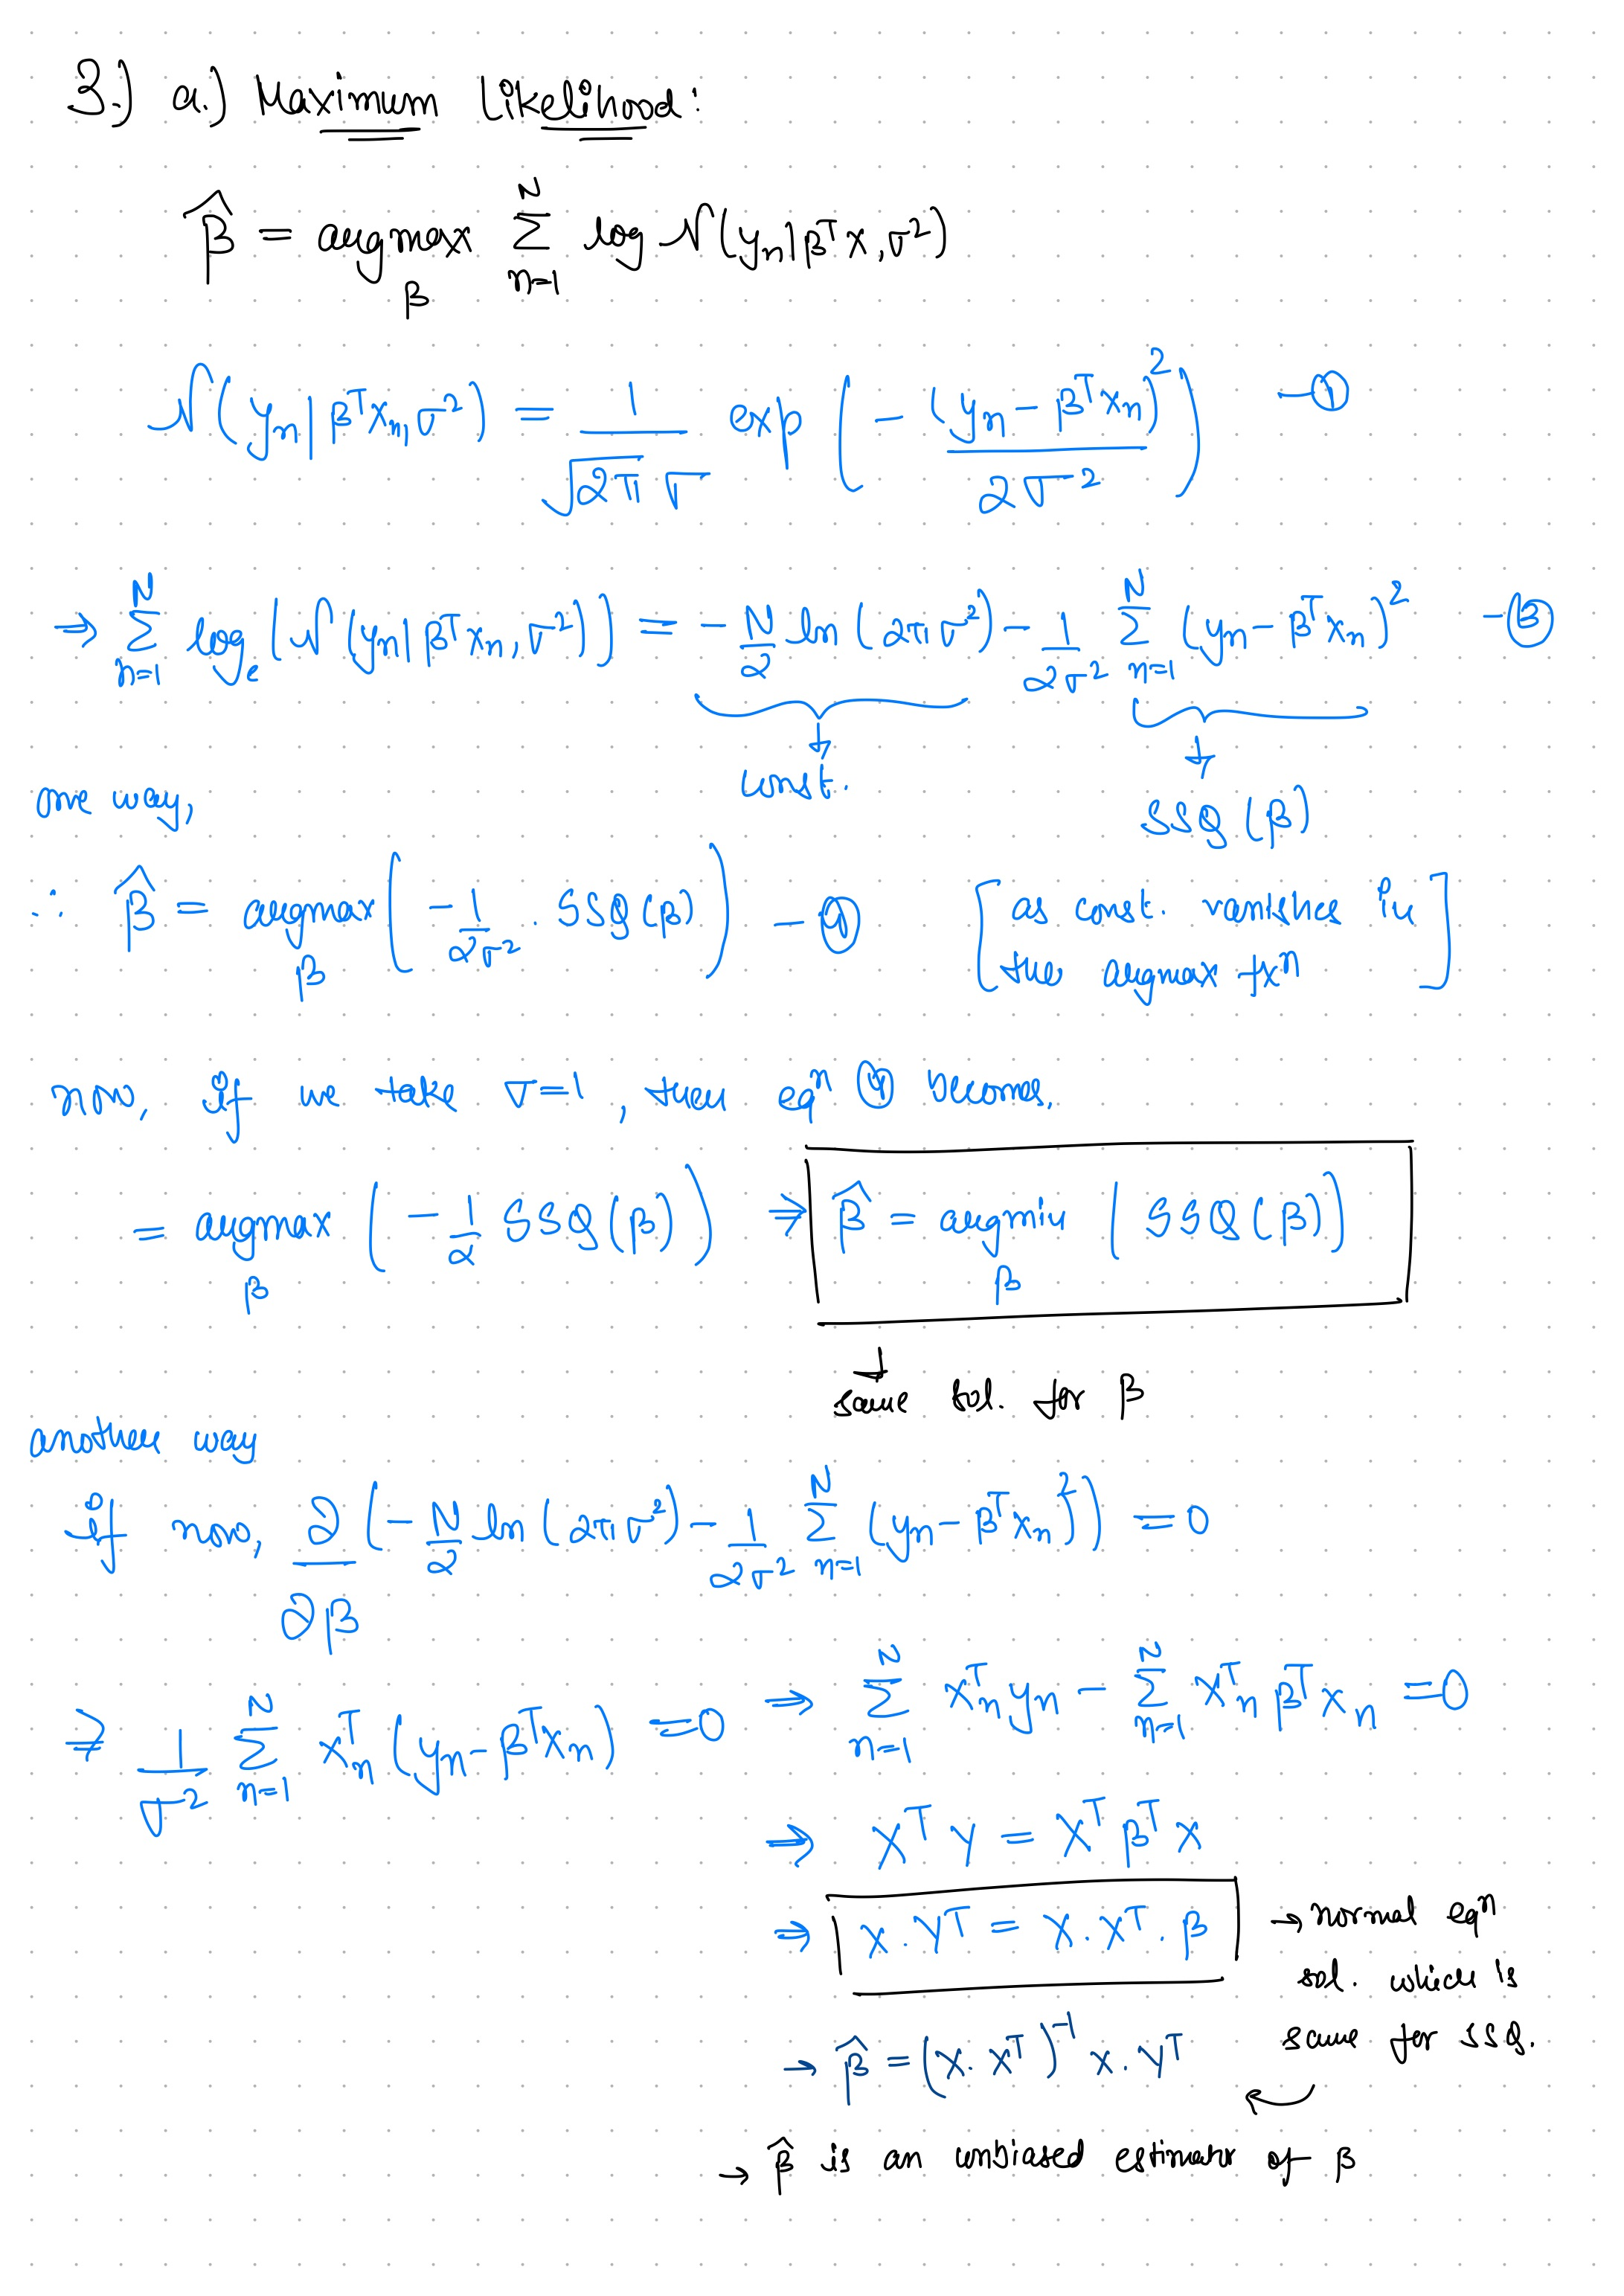

In [27]:
Image(filename='Sheet06-2.jpg') 

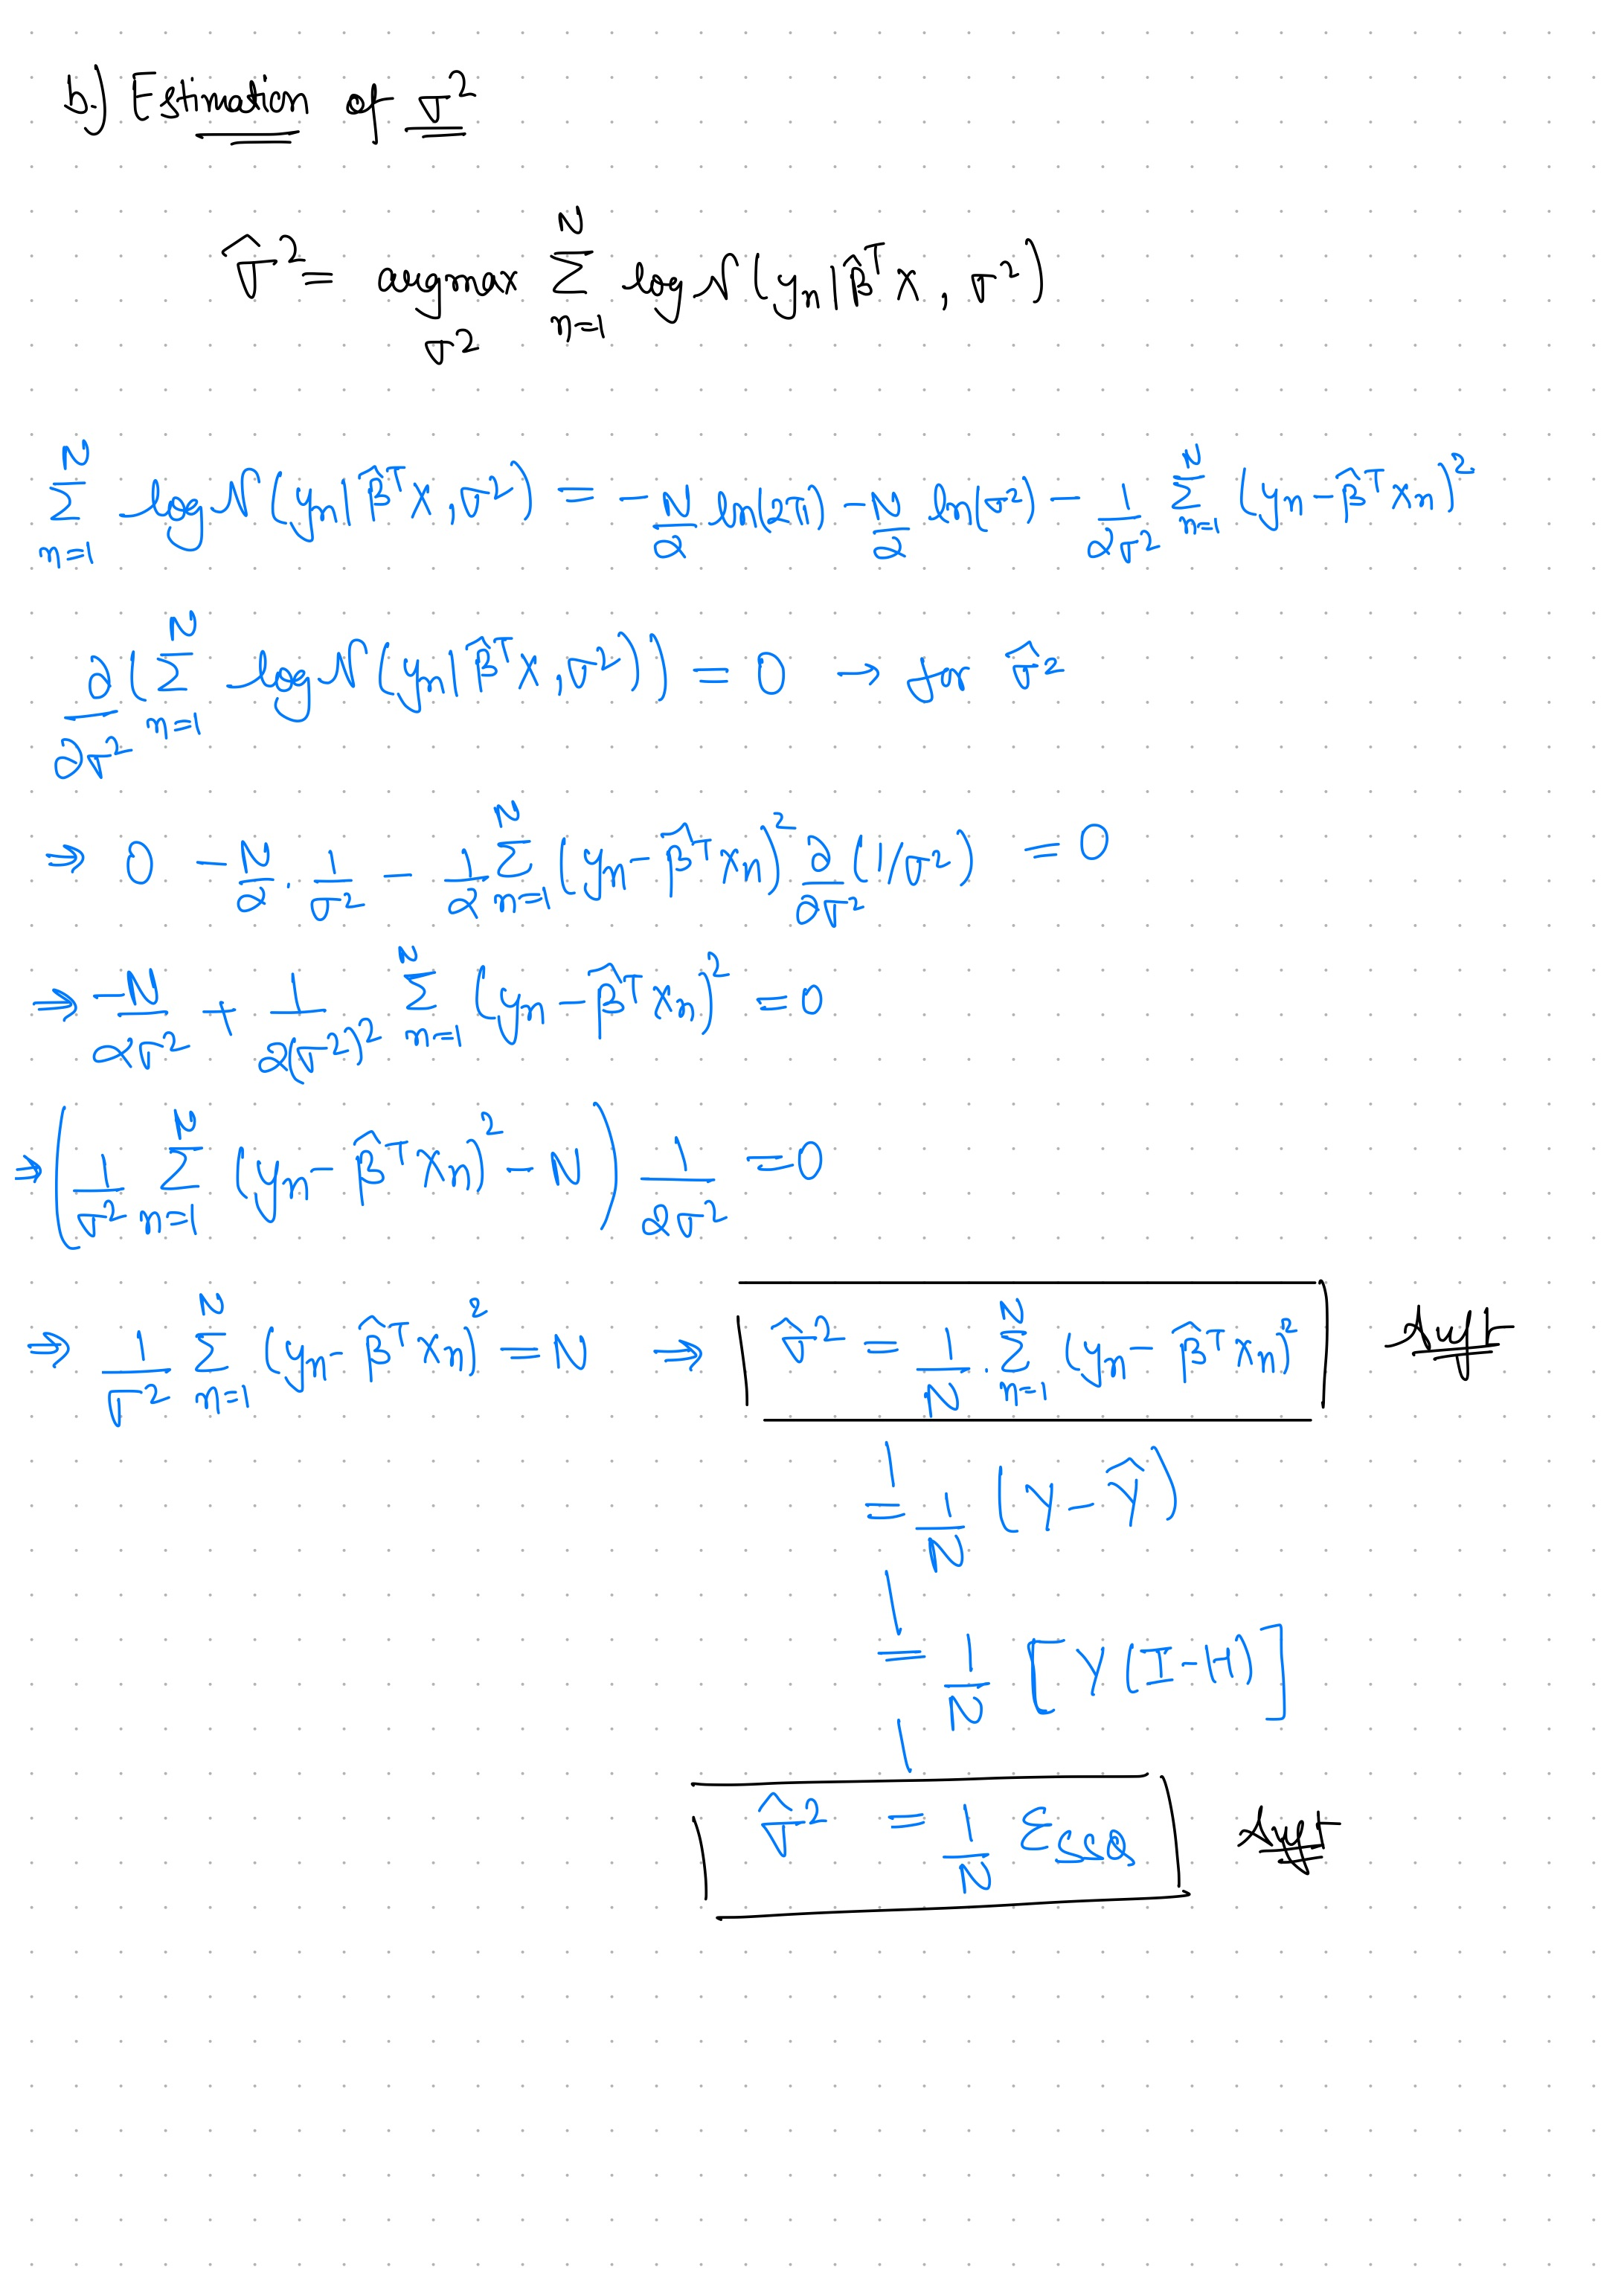

In [28]:
Image(filename='Sheet06-3.jpg') 

## 4 Visualize Regularization Contours

In [3]:
# load the data
data = np.load('data/linreg.npz')
x = data['X']
y = data['Y']
print(f'{x.shape} {y.shape}')

(2, 100) (1, 100)


In [8]:
# TODO: create a grid of points in the parameter space
xlist = np.linspace(-1, 3.0, 100)  ##creating xlists and ylists from -1 to 3 and taking 100 points in between
ylist = np.linspace(-1, 3.0, 100)   ##creating ylists as above
beta1, beta2 = np.meshgrid(xlist, ylist)  ##creating meshgrid

(a)

Text(2313.5643939393935, 0.5, '$\\beta_2$')

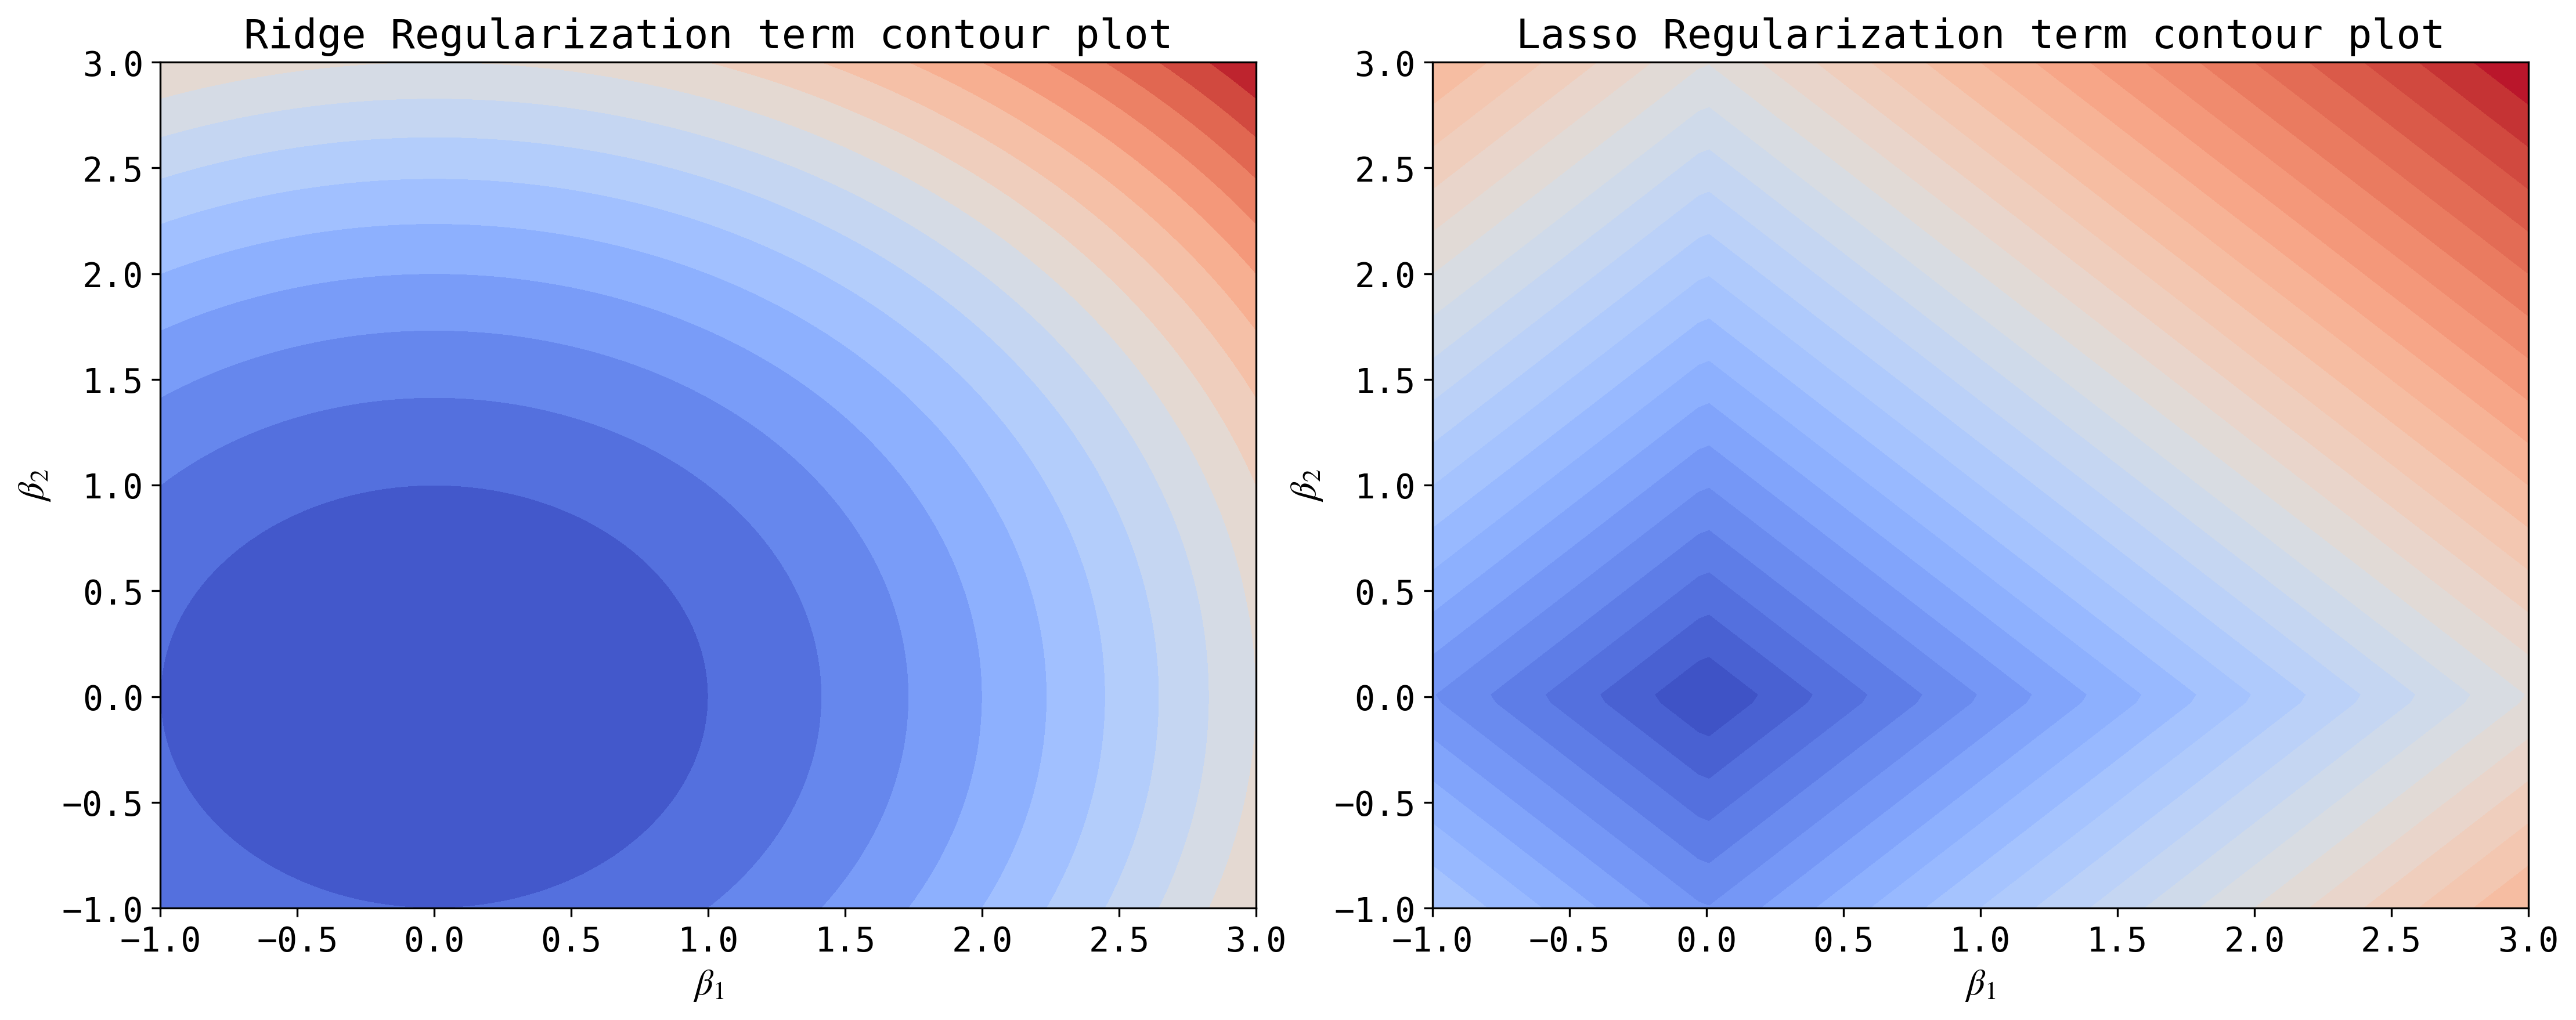

In [12]:
# TODO: make coutour plots for ridge and lasso regularization terms
fig,ax=plt.subplots(1,2,figsize=(15,6),dpi=300)
fig.tight_layout(pad=2)

Z_ridge = beta1**2 + beta2**2  ###calculating ridge regularization term

ax[0].contourf(beta1, beta2, Z_ridge,20, cmap = 'coolwarm',)
ax[0].set_title("Ridge Regularization term contour plot")
ax[0].set_xlabel(r'$\beta_1$',size = 15)
ax[0].set_ylabel(r'$\beta_2$',size  = 15)

##plotting for lasso contour

Z_lasso = np.abs(beta1) + np.abs(beta2)   ###calculating ridge regularization term

ax[1].contourf(beta1,beta2, Z_lasso,30, cmap = 'coolwarm')
ax[1].set_title("Lasso Regularization term contour plot")
ax[1].set_xlabel(r'$\beta_1$',size = 15)
ax[1].set_ylabel(r'$\beta_2$',size  = 15)

(b)

Text(0.5, 1.0, 'Contour plot for SSQ')

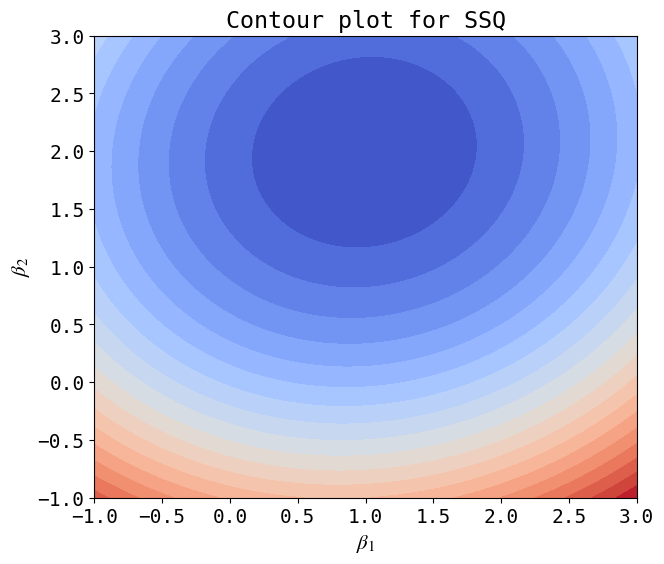

In [14]:
# TODO: for each combination of parameters, compute the sum of squared deviations.
#       do not use loops, but numpy broadcasting!

##first we will convert the meshgrid arrays into an array whose first column is beta1 and second column is beta2

coordinate_arr = np.array([beta1.reshape(-1),beta2.reshape(-1)]).T  ##.rehshape(-1) is used to flatten the array

## then we need to multiply it by the X matrix 
predict_y = coordinate_arr@x  ## each column is now a predicted value for y for a particular value for beta1 and beta2
ssq = np.sum(np.square((y.flatten()-predict_y)),axis = 1)
ssq = ssq.reshape(beta1.shape)  ##changing ssq shape to be shame as grid 

# TODO: make a coutour plot for sum of squared deviations
plt.figure(figsize=(7,6))
plt.contourf(beta1, beta2,ssq,20, cmap = 'coolwarm',)
plt.xlabel(r'$\beta_1$',size = 15)
plt.ylabel(r'$\beta_2$',size  = 15)
plt.title("Contour plot for SSQ")


#### 4.C

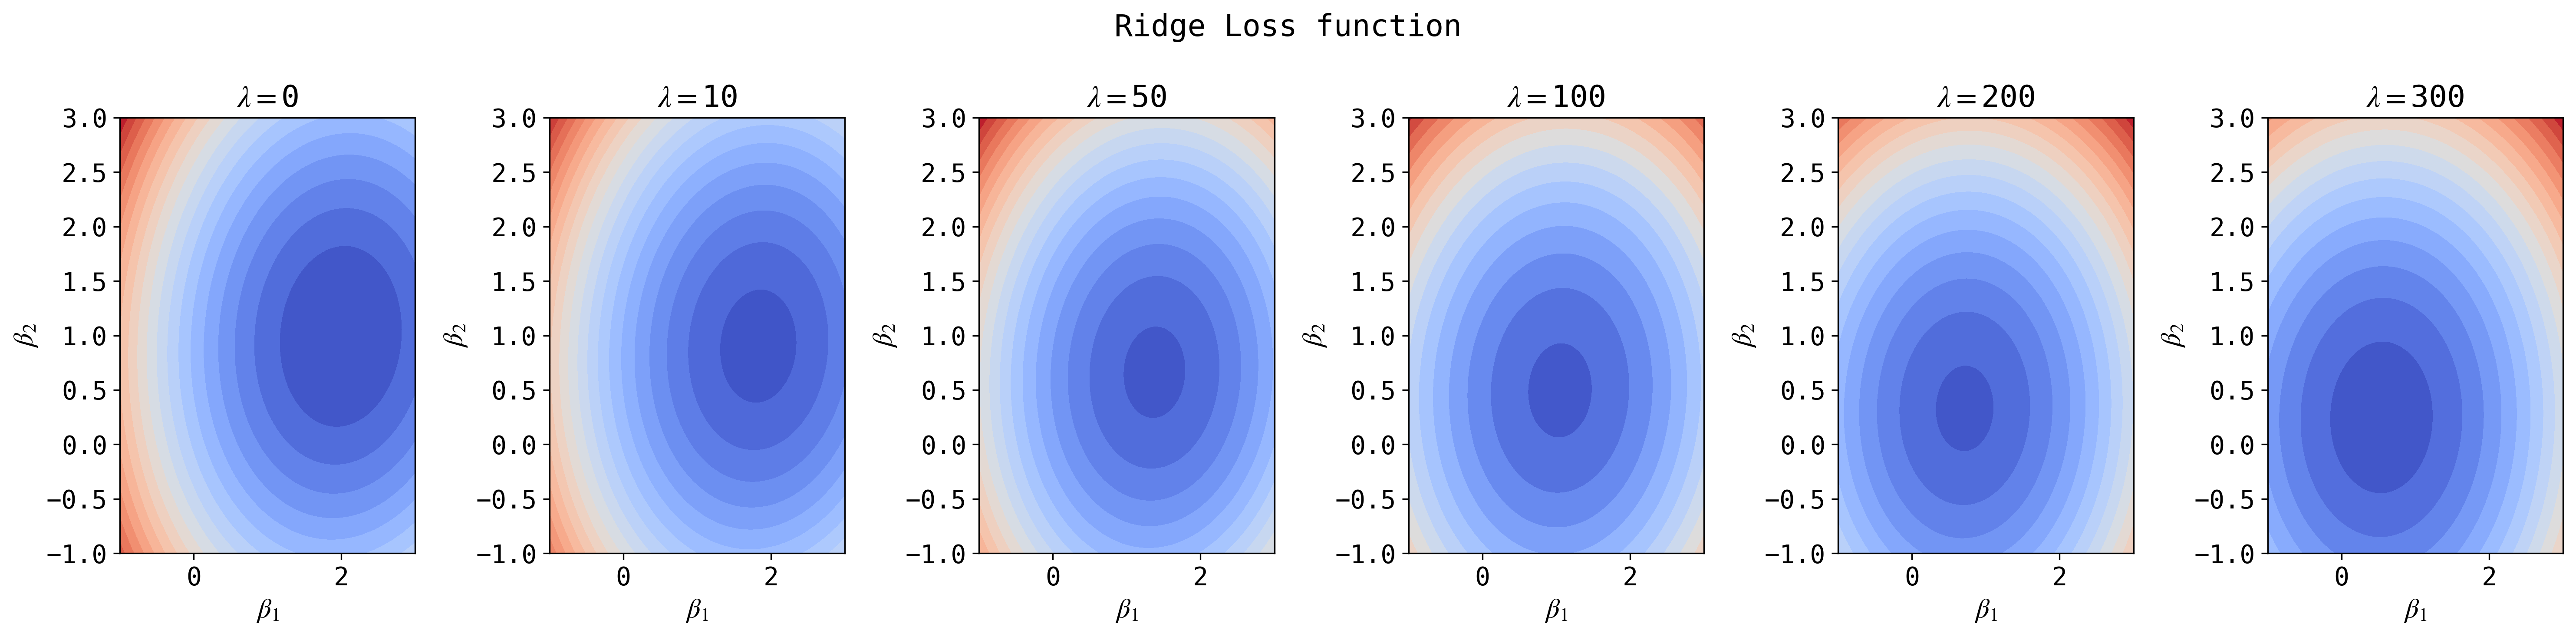

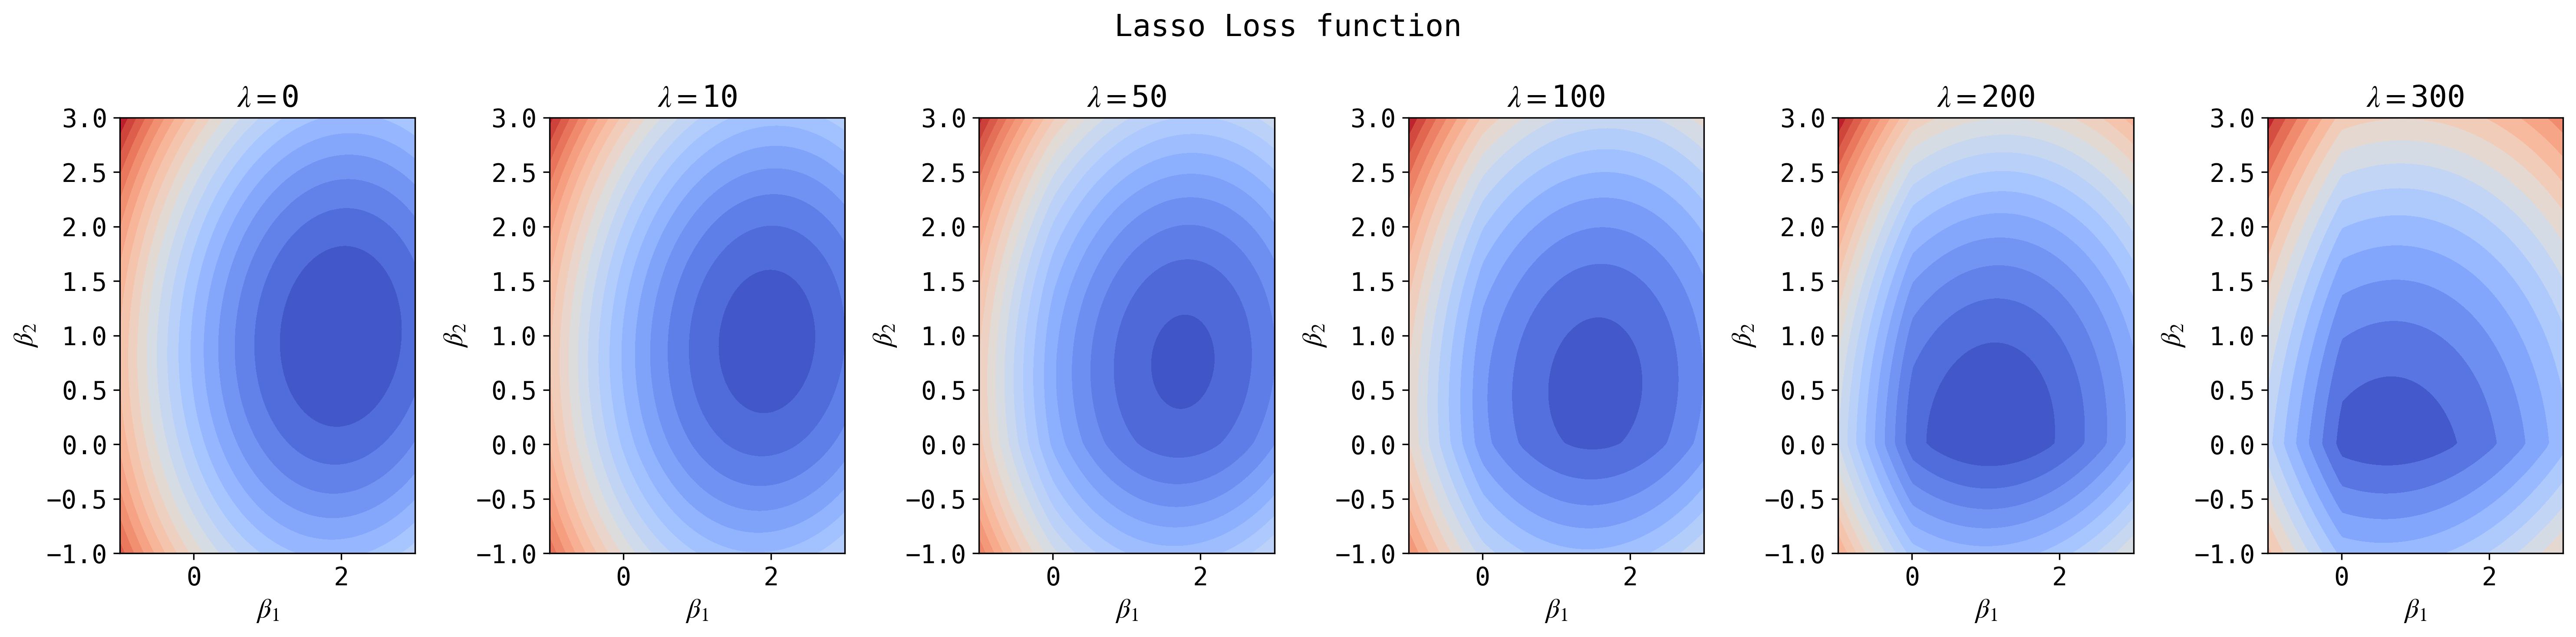

In [15]:
# TODO: for each lambda, plot both ridge regression and lasso loss functions
lambdas = [0, 10, 50, 100, 200, 300]
loss = {"Ridge":Z_ridge,"Lasso":Z_lasso}
for i in loss:
    fig,ax=plt.subplots(ncols = len(lambdas),figsize = (20,5),dpi=300)
    for j in range(len(lambdas)):
        Z = ssq+lambdas[j]*loss[i]
        cp = ax[j].contourf(beta2, beta1, Z,20, cmap = 'coolwarm')
        ax[j].set_title(r'$\lambda = $' + str(lambdas[j]))
        ax[j].set_xlabel(r'$\beta_1$',size = 15)
        ax[j].set_ylabel(r'$\beta_2$',size  = 15)
    plt.suptitle(i+" Loss function")
    plt.tight_layout()
    plt.show()

## CT

set up design matrix (run this once to save to disk)

In [82]:
# create design matrix
# don't change any of this, just run it once to create and save the design matrix
import os

if not os.path.exists('data/design_matrix.npy'):
    res = (99, 117)
    xs = np.arange(0, res[1]+1) - res[1]/2 # np.linspace(-1, 1, res[1] + 1)
    ys = np.arange(0, res[0]+1) - res[0]/2 #np.linspace(-1, 1, res[0] + 1)

    # rays are defined by origin and direction
    n_parallel_rays = 70 
    ray_offset_range = [-res[1]/1.5, res[1]/1.5]
    n_ray_angles = 30
    n_rays = n_parallel_rays * n_ray_angles

    ray_angles = np.linspace(0, np.pi, n_ray_angles, endpoint=False) + np.pi/n_ray_angles
    
    # offsets for ray_angle = 0, i.e. parallel to x-axis
    ray_0_offsets = np.stack([np.zeros(n_parallel_rays), np.linspace(*ray_offset_range, n_parallel_rays)], axis=-1)
    ray_0_directions = np.stack([np.ones(n_parallel_rays), np.zeros(n_parallel_rays)], axis=-1)

    def rot_mat(angle):
        c, s = np.cos(angle), np.sin(angle)
        return np.stack([np.stack([c, s], axis=-1), np.stack([-s, c], axis=-1)], axis=-1)

    ray_rot_mats = rot_mat(ray_angles)

    ray_offsets = np.einsum('oi,aij->aoj', ray_0_offsets, ray_rot_mats).reshape(-1, 2)
    ray_directions = np.einsum('oi,aij->aoj', ray_0_directions, ray_rot_mats).reshape(-1, 2)

    sigma = 1
    kernel = lambda x: np.exp(-x**2/sigma**2/2)

    xsc = (xs[1:] + xs[:-1]) / 2
    ysc = (ys[1:] + ys[:-1]) / 2
    b = np.stack(np.meshgrid(xsc, ysc), axis=-1).reshape(-1, 2)
    a = ray_offsets
    v = ray_directions
    v = v / np.linalg.norm(v, axis=-1, keepdims=True)
    p = ((b[None] - a[:, None]) * v[:, None]).sum(-1, keepdims=True) * v[:, None] + a[:, None]
    d = np.linalg.norm(b - p, axis=-1)
    d = kernel(d)
    design_matrix = d.T

    np.save('data/design_matrix.npy', design_matrix)
    print(f'created and saved design matrix of shape {design_matrix.shape} at data/design_matrix.npy')

created and saved design matrix of shape (11583, 2100) at data/design_matrix.npy


(a)

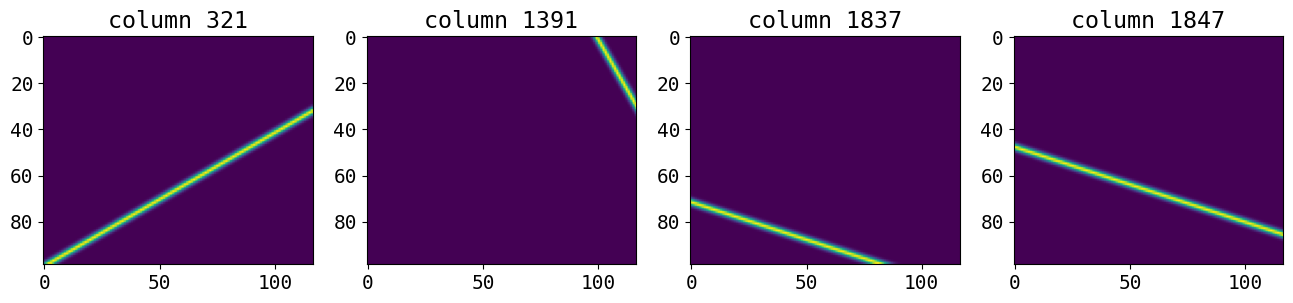

In [47]:
design_matrix = np.load('data/design_matrix.npy')

# TODO: visualize four random columns as images, using an image shape of (99, 117)
img_shape = (99, 117)

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i, ax in zip(np.random.choice(np.arange(design_matrix.shape[1]), 4), axs):
    ax.imshow(design_matrix[:, i].reshape(*res));
    ax.set_title(f'column {i}')

#### Interpretation of the column of the Matrix $X$

To be honest , we could not make any sense from the images but based on the definition given in the exercise we conclude that a particular column represents a detector reading at one specific angle while the object is scanned longitudinally.



Text(0.5, 1.0, 'Sinogram')

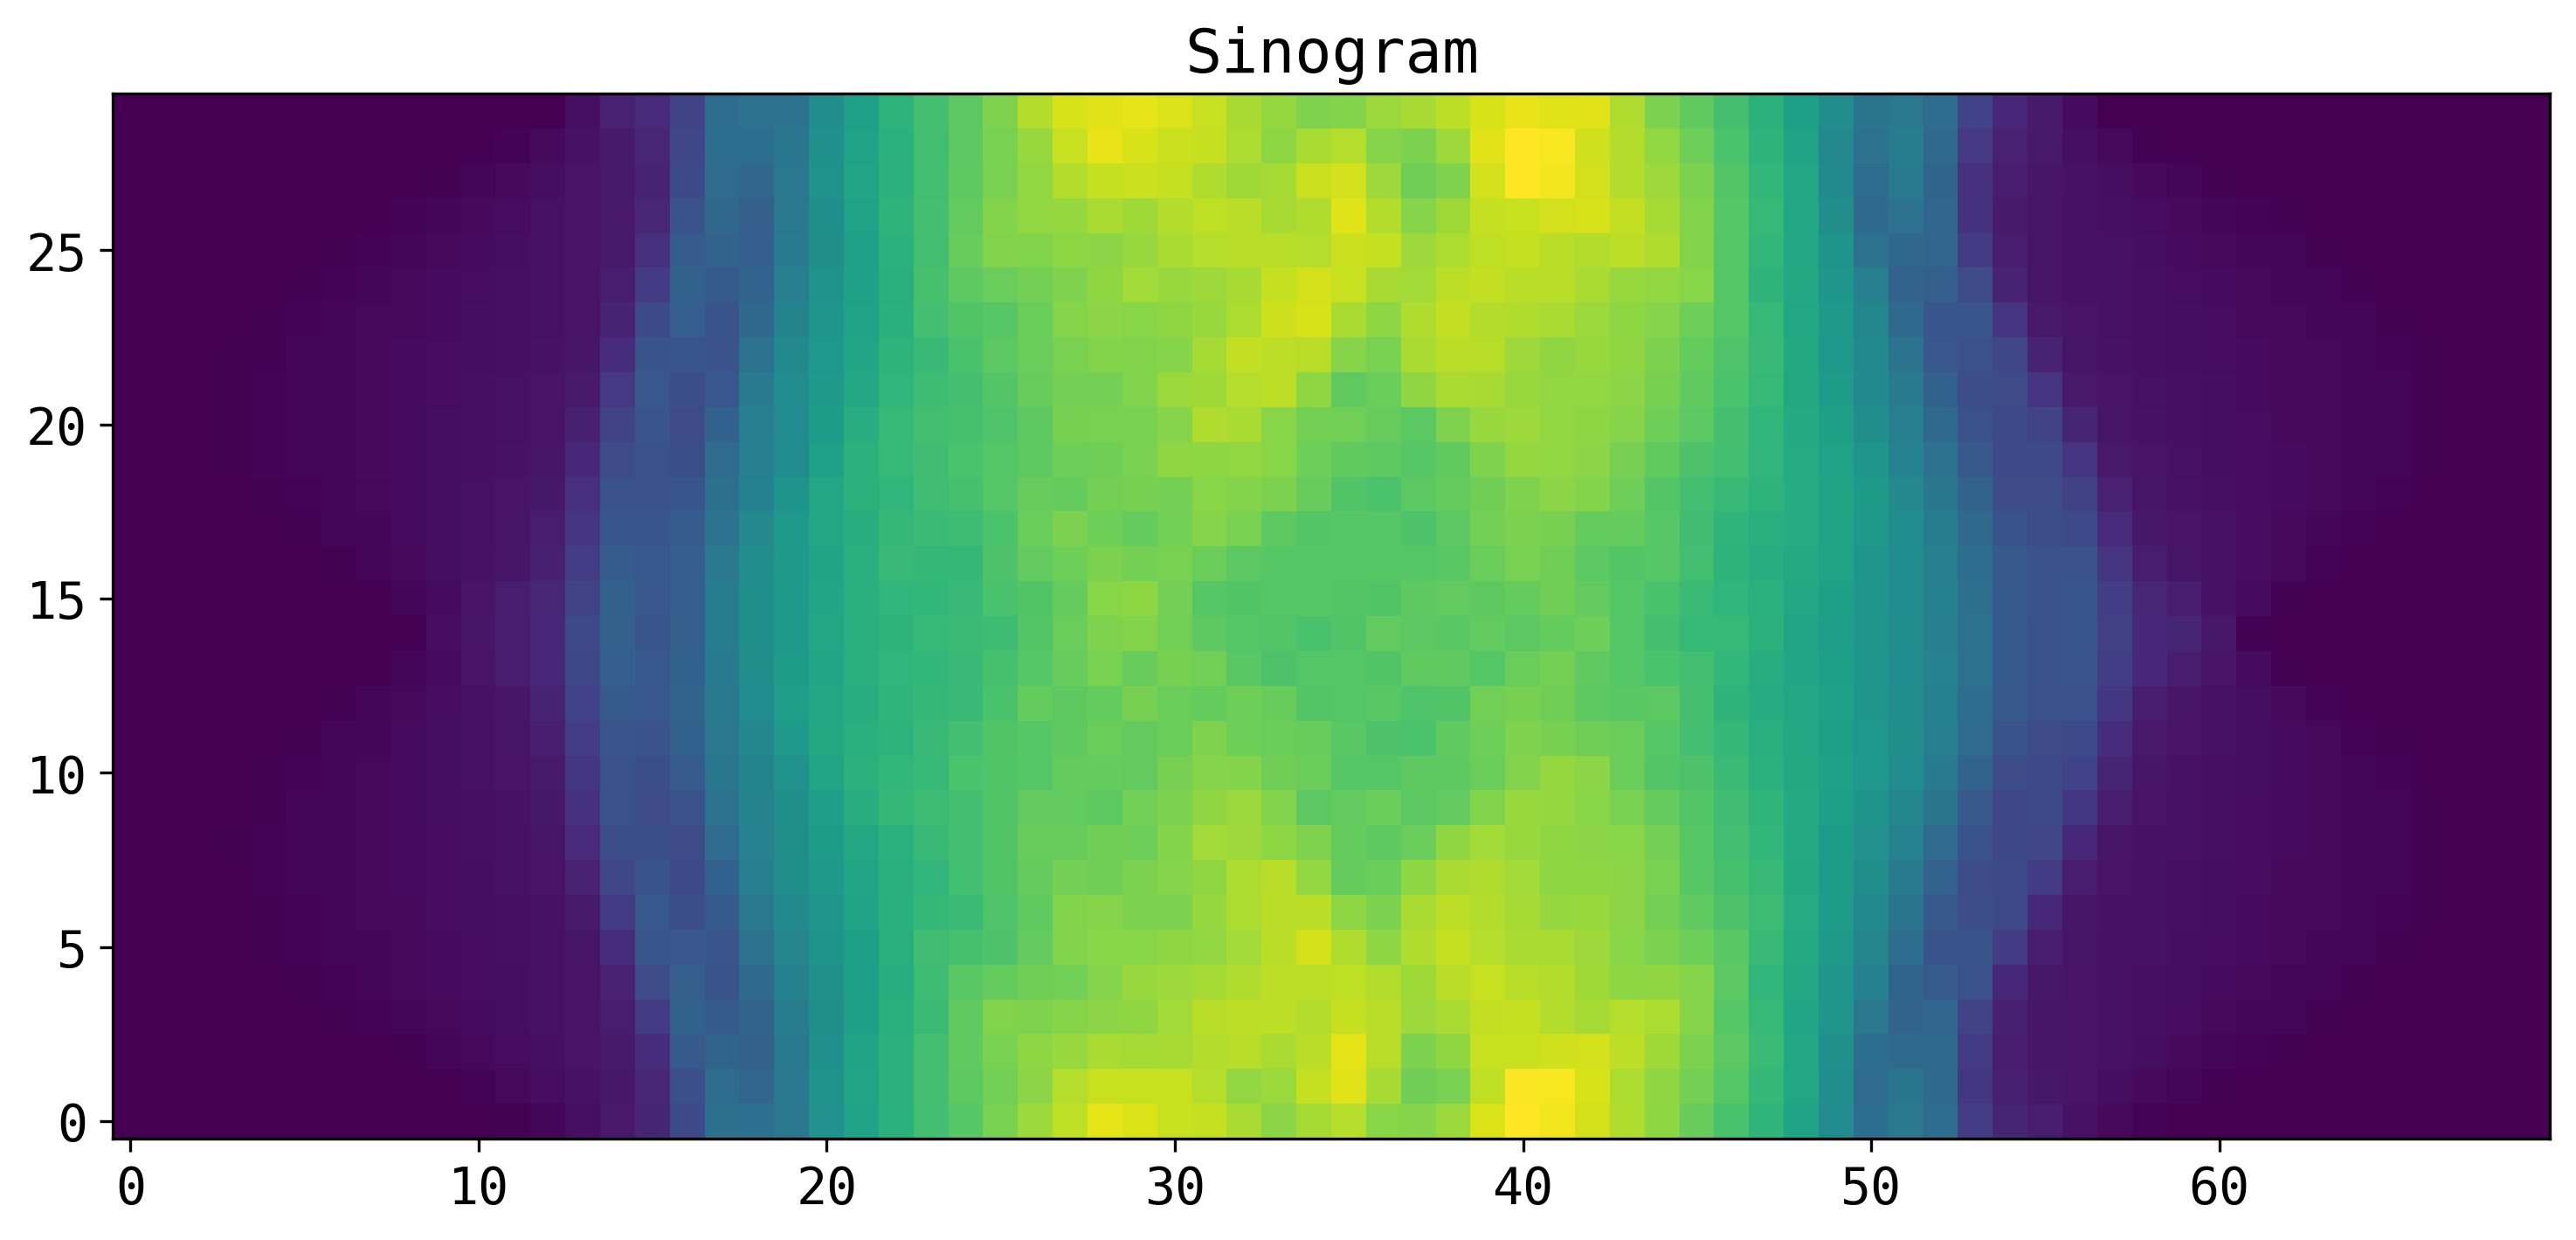

In [57]:
sino = np.load('data/sino.npy')

# visualize sinogram as image
n_parrallel_rays = 70
n_angles = 30

plt.figure(figsize=(12,6),dpi=300)
plt.imshow(sino.reshape(n_angles, n_parallel_rays), origin='lower');
plt.title('Sinogram')

# x - shows rays at different angles
# y - shows different angles

(b)

Text(0.5, 1.0, 'Image from Linear Regression')

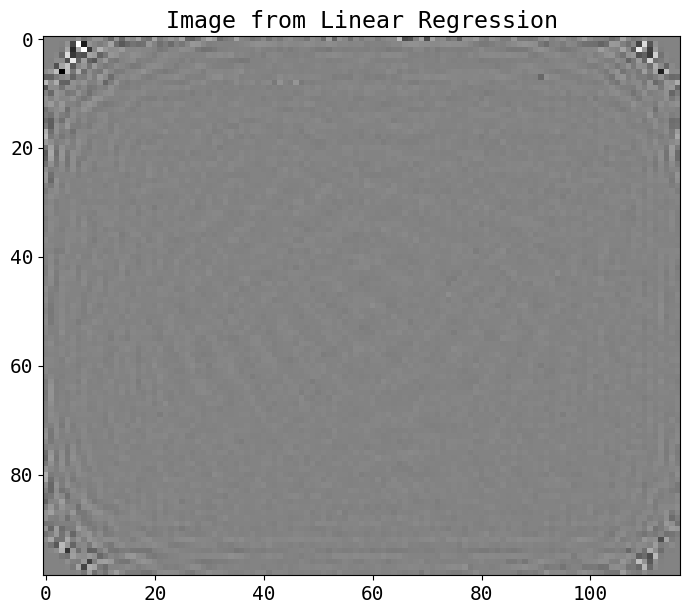

In [70]:
# TODO: solve the reconstruction with linear regression and visualize the result
# We are implementing scikit learn Linear Regression for this
model = LinearRegression()  ##initialing the regression model
model.fit(design_matrix.T,sino.reshape(-1))   ##fitting the  model for the  data
image_LR =  model.coef_.reshape(*res)  ##getting the coefficients and converting their shape to 99*117

##plotting the image
plt.figure(figsize=(10,7))
plt.imshow(image_LR,cmap = 'gray');
plt.title("Image from Linear Regression")

### Too many pixels as compared to observations therefore the regressor is overfitting. 

In [16]:
# TODO: solve the reconstruction with ridge regression and visualize the result
clf = Ridge(alpha=0.01)  ##creating the ridge regression model with strength  = 1
clf.fit(design_matrix.T,sino.reshape(-1))  ##fitting the model with the input data
image_ridge  =   clf.coef_.reshape(*res)  ##getting the coefficient and changing their shape as (99,117)  

##plotting the image
plt.figure(figsize=(10,7))
plt.imshow(image_ridge,cmap = 'gray');
plt.title("Image from Ridge Regression")

NameError: name 'design_matrix' is not defined

### As we clearly see that for the Linear Regression the image we get is completely blurry (because of overfitting) and it is almost impossible to make any sense of the first image. On the other hand for Ridge regression we see the well defined image for the brain tissues.

### But as we increase the regression length the image again turns blurry(see below).

## Ridge Regression for different Regularization Strength $\lambda$

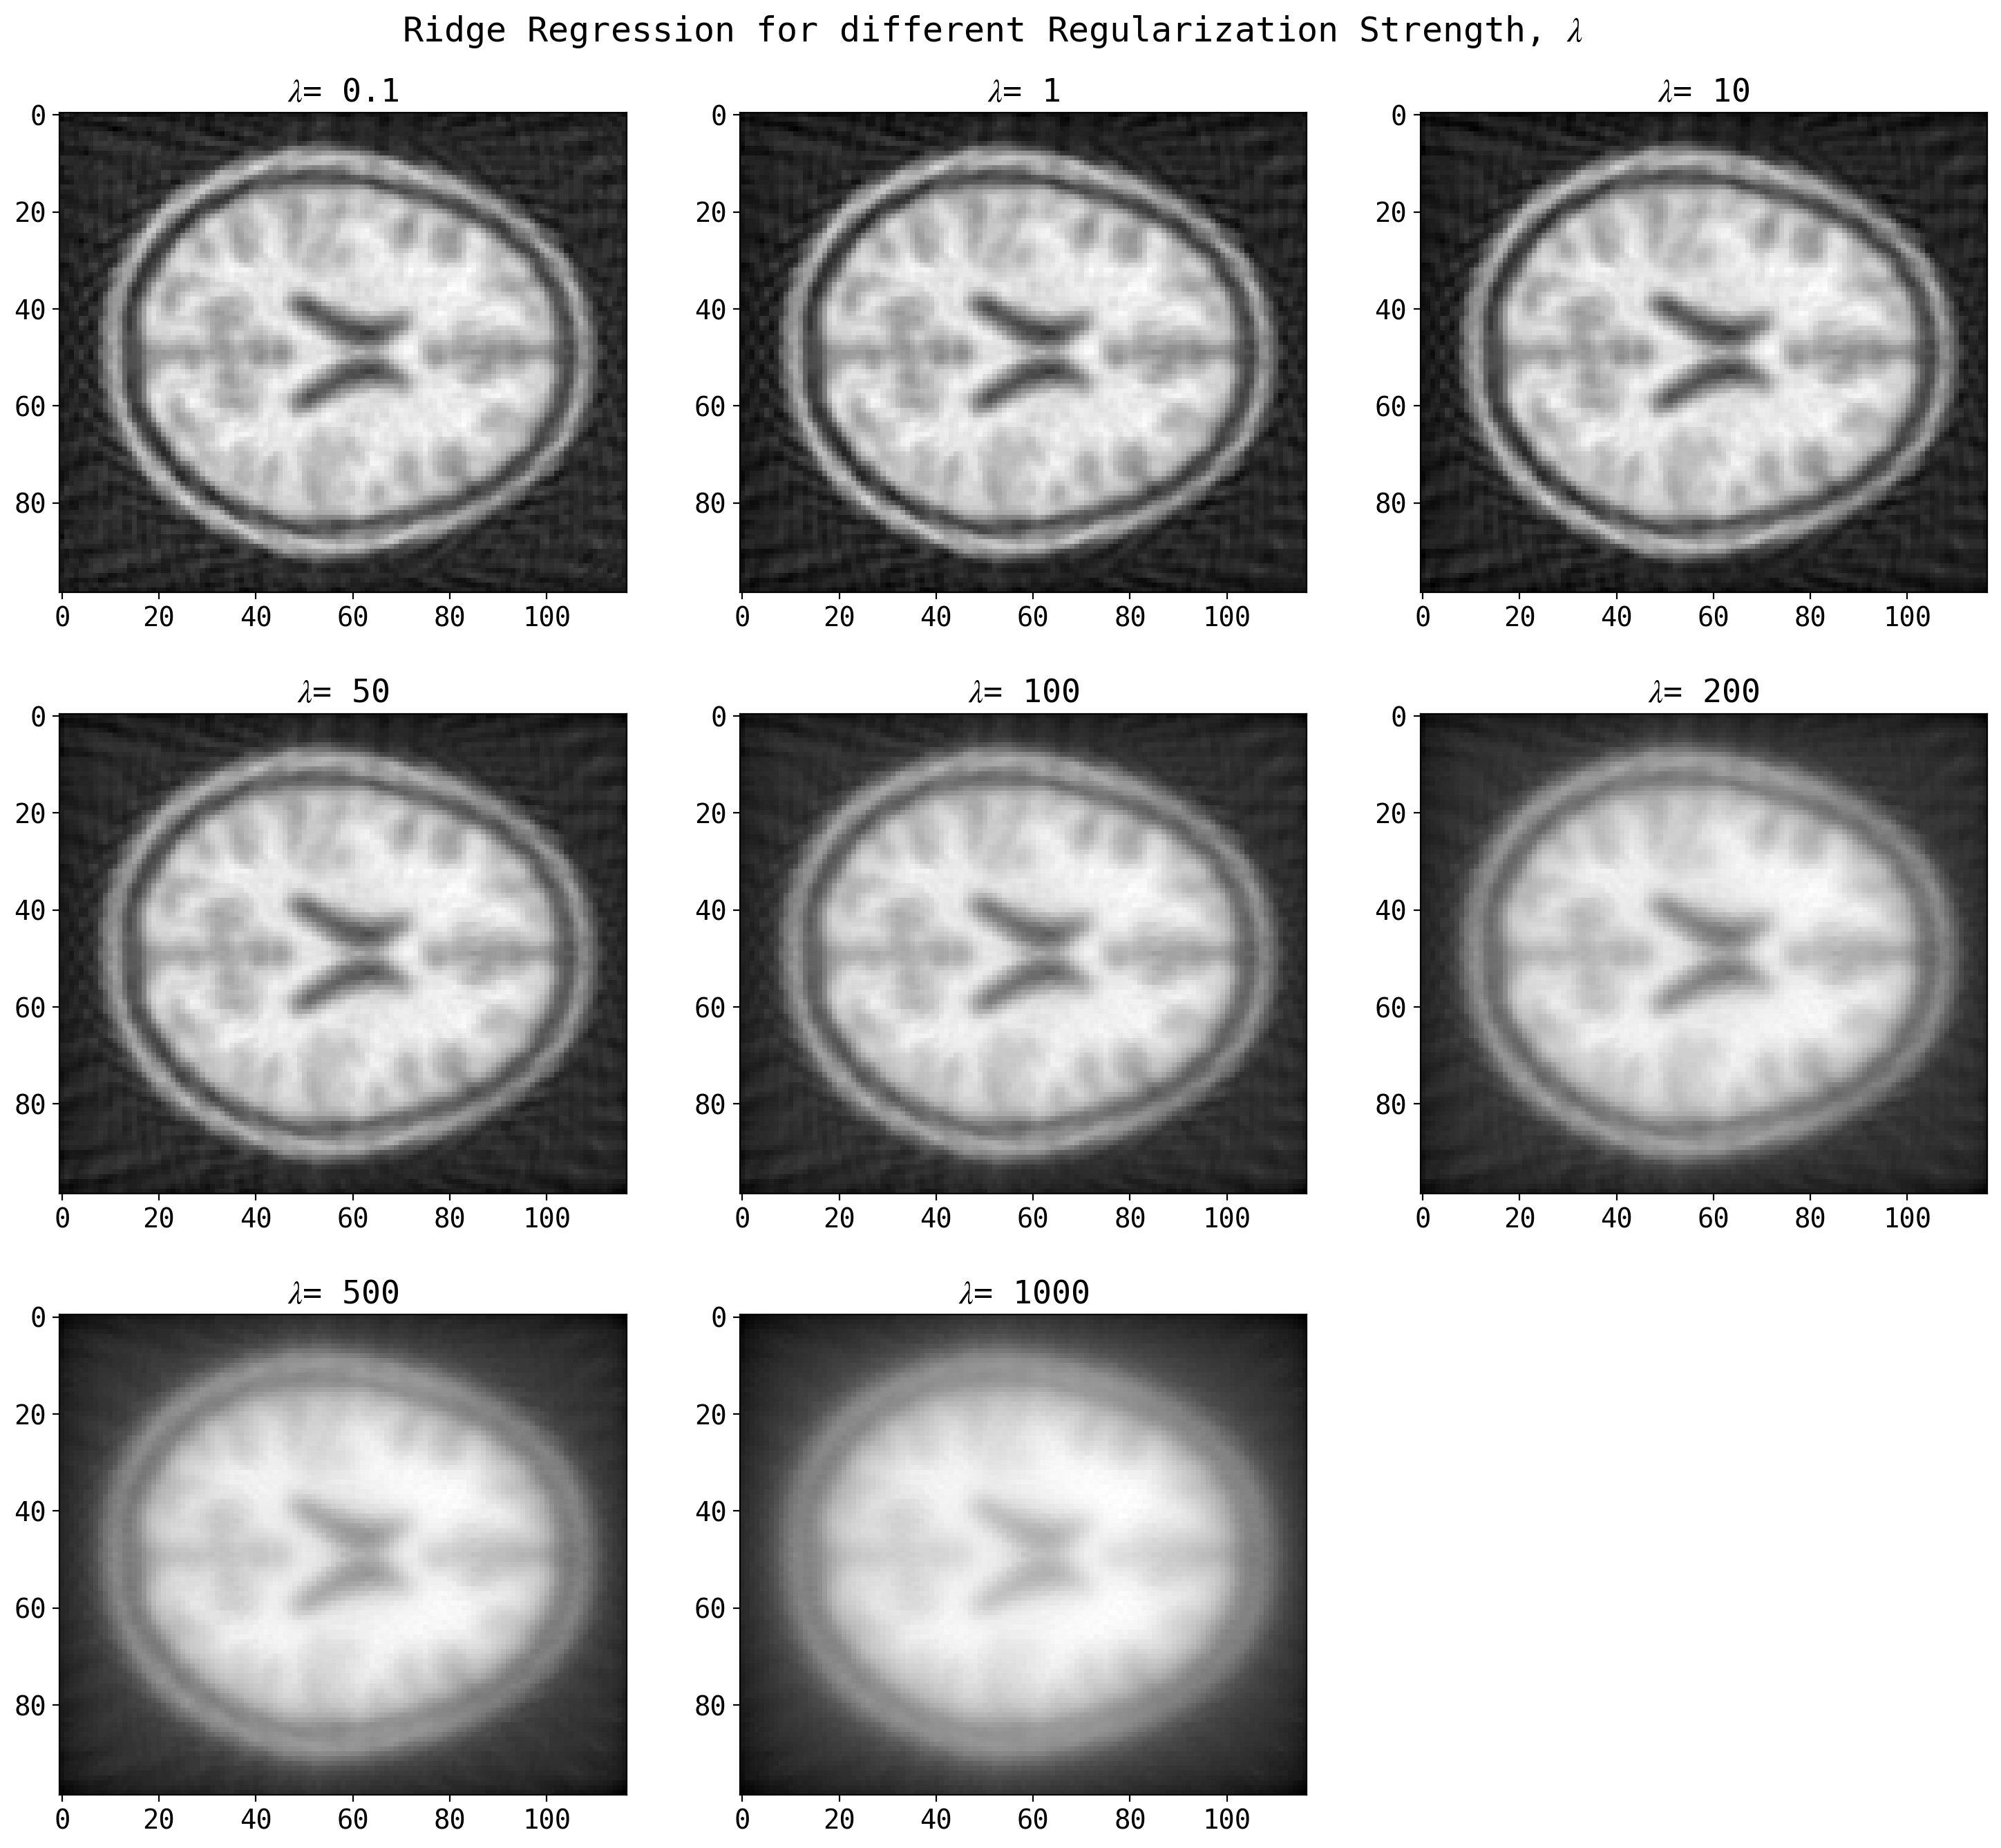

In [81]:
## plotting the image for different regularization strength

lambdas = [0.1,1,10,50,100,200,500,1000]


plt.figure(figsize=(18,16),dpi=200)
# plt.subplots_adjust(hspace=0.2)
plt.suptitle(f"Ridge Regression for different Regularization Strength, $\lambda$", fontsize=18,y=0.92)
plt.tight_layout(pad=2)


#setting no. of rows and columns for subplot
ncols = 3
nrows = len(lambdas) // ncols + (len(lambdas) % ncols > 0) # calculating number of rows

for n,i in enumerate(lambdas):
    clf = Ridge(alpha=i)  ##creating the ridge regression model with strength  = 1
    clf.fit(design_matrix.T,sino.reshape(-1))  ##fitting the model with the input data
    image_ridge = clf.coef_.reshape(*res)  ##getting the coefficient and changing their shape as (99,117)  
    # plt.figure(figsize = (8,5))  ##initializing the figure
    
    ax = plt.subplot(nrows, ncols, n + 1)
    ax.imshow(image_ridge,cmap = 'gray') ##plotting the image
    ax.set_title(f'$\lambda $= {i}')
